In [12]:
import os.path
import zipfile

import numpy as np

from skimage import io as skimageio
from skimage import color as skimagecolor

import matplotlib.pyplot as plt


In [2]:
# hyperparameter
batch_size = 128

In [3]:
# Env check
# check dataset file exists
dataset_path = 'garbage_classification.zip'
if not os.path.isfile(dataset_path):
    print("The dataset is not found. Please put it in the root of the directory and rename it as \"garbage_classification.zip\".")
    print("The link of the dataset is: https://drive.google.com/file/d/1kcwBy_yG47Mp2iyq6Oo6ACojgdXRt4Bs/view?usp=sharing")
    exit()

# extract the dataset
if not os.path.exists("garbage_classification/"):
    print("extracting the dataset... ")
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall("./")
print("The dataset has been extracted.")

The dataset has been extracted.


In [4]:
# define dataloader
from PIL import Image
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

categories = {
    "battery": 0,
    "biological": 1,
    "brown-glass": 2,
    "cardboard": 3,
    "clothes": 4,
    "green-glass": 5,
    "metal": 6,
    "paper": 7,
    "plastic": 8,
    "shoes": 9,
    "trash": 10,
    "white-glass": 11,
}

data_transforms = {
    "train": transforms.Compose(
        [
            # data augmentation
            transforms.RandomRotation(45),  # random rotation from -45 to 45 degrees
            transforms.RandomHorizontalFlip(
                p=0.5
            ),  # random rotation from probability p
            transforms.RandomVerticalFlip(
                p=0.5
            ),  # random vertical flip from probability p
            transforms.ColorJitter(
                brightness=0.2, contrast=0.1, saturation=0.1, hue=0.1
            ),
            transforms.RandomGrayscale(
                p=0.025
            ),  # randomly transform color to grayscae, R=G=B for 3 channels
            # ritual transformation
            transforms.Resize(256),
            transforms.CenterCrop(224),  # center crop
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
    "valid": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}


class MyDataset(Dataset):
    def __init__(self, txt_path, transform=None, target_transform=None):
        fh = open(txt_path, "r")
        imgs = []
        for line in fh:
            line = line.rstrip()
            words = line.split("/")
            imgs.append((line, categories[words[1]]))
            print(categories[words[1]])
            self.imgs = imgs
            self.transform = transform
            self.target_transform = target_transform

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, index):
        fn, label = self.imgs[
            index
        ]  # self.imgs是一个list，self.imgs的一个元素是一个str，包含图片路径，图片标签，这些信息是在init函数中从txt文件中读取的
        # fn是一个图片路径
        img = Image.open(fn).convert(
            "RGB"
        )  # 利用Image.open对图片进行读取，img类型为 Image ，mode=‘RGB’
        if self.transform is not None:
            img = self.transform(img)
        return img, label


# Load dataset
train_path_file = "garbage_classification/train.txt"
test_path_file = "garbage_classification/test.txt"
val_path_file = "garbage_classification/val.txt"
train_data = MyDataset(
    txt_path=train_path_file, transform=data_transforms["train"]
)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
valid_data = MyDataset(
    txt_path=val_path_file, transform=data_transforms["valid"]
)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)

# show the first 10 data
# for epoch in range(1):
#     for step, (path, label) in enumerate(train_loader):
#         print('Epoch: ', epoch, '| Step: ', step, '| path: ',
#               path, '| label: ', label)

c:\Users\tydta\.conda\envs\cie6004\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [17]:
# Load dataset
train_path_file = "garbage_classification/train.txt"
test_path_file = "garbage_classification/test.txt"
val_path_file = "garbage_classification/val.txt"
# read path file
train_file_paths = []
test_file_paths = []
val_file_paths = []
with open(train_path_file) as file:
    train_file_paths = [line.rstrip() for line in file]
with open(test_path_file) as file:
    test_file_paths = [line.rstrip() for line in file]
with open(val_path_file) as file:
    val_file_paths = [line.rstrip() for line in file]
print("The size of train data: ",len(train_file_paths))
print("The size of test data: ",len(test_file_paths))
print("The size of val data: ",len(val_file_paths))



The size of train data:  9923
The size of test data:  3106
The size of val data:  2486


The dataset is read. Analyzing the dataset...


The minimal of width:  110
The minimal of height:  106
The maximal of width:  888
The maximal of width:  936
Here are some samples from the dataset: 


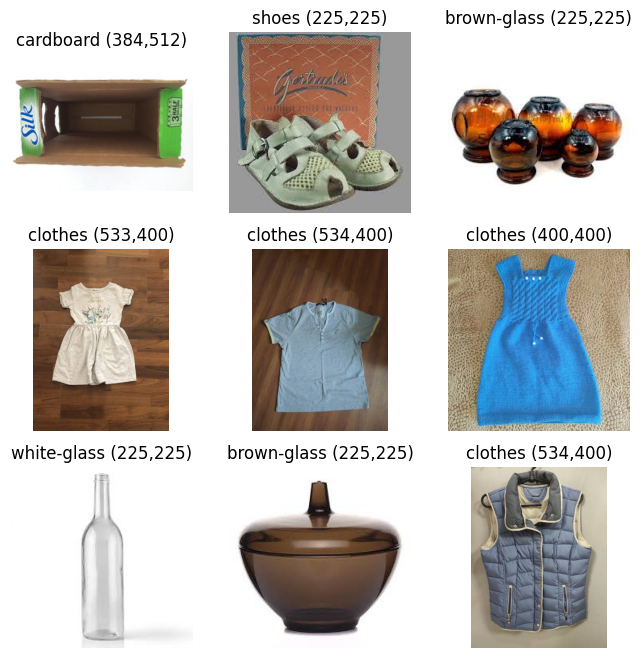

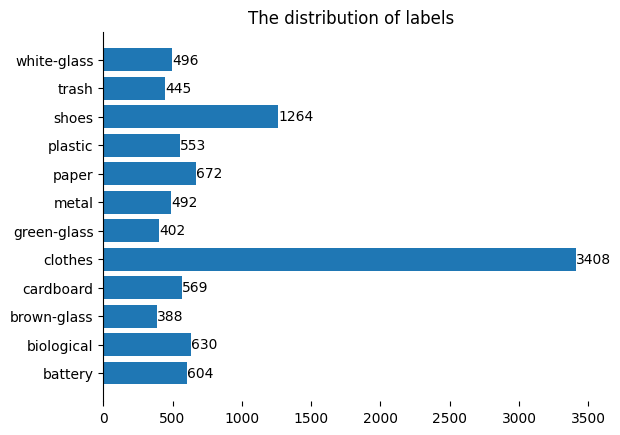

{'battery': 604, 'biological': 630, 'brown-glass': 388, 'cardboard': 569, 'clothes': 3408, 'green-glass': 402, 'metal': 492, 'paper': 672, 'plastic': 553, 'shoes': 1264, 'trash': 445, 'white-glass': 496}


In [36]:
# Analyze dataset
print("The dataset is read. Analyzing the dataset...")
# read dataset
w_min = 100000
w_max = -1
h_min = 100000
h_max = -1
for path in train_file_paths:
    im = skimageio.imread(path)
    if h_min > im.shape[0]:
        h_min = im.shape[0]
    if w_min > im.shape[1]:
        w_min = im.shape[1]
    if h_max < im.shape[0]:
        h_max = im.shape[0]
    if w_max < im.shape[1]:
        w_max = im.shape[1]

print("The minimal of width: " , w_min)
print("The minimal of height: " , h_min)
print("The maximal of width: " , w_max)
print("The maximal of width: " , h_max)

# Pick up some samples from dataset
print("Here are some samples from the dataset: ")
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_file_paths), size=(1, )).item()
    img_path = train_file_paths[sample_idx]
    img_path = img_path.rstrip()
    label = img_path.split("/")[1]
    figure.add_subplot(rows, cols, i)
    img = Image.open(img_path).convert(
        "RGB"
    )  # 利用Image.open对图片进行读取，img类型为 Image ，mode=‘RGB’
    img_array = np.array(img)
    label = label + " (" + str(img_array.shape[0]) + ","+str(img_array.shape[1]) + ")"
    plt.title(label)
    plt.axis("off")
    plt.imshow(img)
plt.show()

# Show the distribution of labels
data = {
    "battery": 0,
    "biological": 0,
    "brown-glass": 0,
    "cardboard": 0,
    "clothes": 0,
    "green-glass": 0,
    "metal": 0,
    "paper": 0,
    "plastic": 0,
    "shoes": 0,
    "trash": 0,
    "white-glass": 0,
}
for path in train_file_paths:
    label = path.split("/")[1]
    data[label] = data[label] + 1
x = []
y = []
for item in data.items():
    x.append(item[0])
    y.append(item[1])
plt.title("The distribution of labels")
bar = plt.barh(x,y)
plt.bar_label(bar, label_type='edge')
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
print(data)

# Show the distribution of the area of images, for better under stand the dataset
# present_data = data.values()
# plt.hist(present_data, bins=30, color='skyblue', alpha=0.8)
# # 设置图表属性
# plt.title('RUNOOB hist() Test')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# # 显示图表
# plt.show()

In [6]:
torch.cuda.is_available()
from tqdm import tqdm

In [7]:
# 防止SSL报错
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# define the model
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from einops.layers.torch import Rearrange
from tqdm import tqdm

# 定义一个基本的Transformer块
class TransformerBlock(nn.Module):
    def __init__(self, dim, num_heads, mlp_dim, dropout=0.1):
        super(TransformerBlock, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=dim, num_heads=num_heads, dropout=dropout)
        self.mlp = nn.Sequential(
            nn.Linear(dim, mlp_dim),
            nn.ReLU(),
            nn.Linear(mlp_dim, dim),
        )
        self.norm1 = nn.LayerNorm(dim)
        self.norm2 = nn.LayerNorm(dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attended, _ = self.attention(x, x, x)
        x = x + self.dropout(attended)
        x = self.norm1(x)
        mlp_output = self.mlp(x)
        x = x + self.dropout(mlp_output)
        x = self.norm2(x)
        return x

# 定义Vision Transformer模型
class VisionTransformer(nn.Module):
    def __init__(self, image_size, patch_size, num_classes, dim, num_heads, num_layers, mlp_dim, dropout=0.1):
        super(VisionTransformer, self).__init__()
        assert image_size % patch_size == 0, "image_size must be divisible by patch_size"
        num_patches = (image_size // patch_size) ** 2
        patch_dim = 3 * patch_size ** 2  # 3 channels for RGB images

        self.embedding = nn.Sequential(
            Rearrange('b c (h p1) (w p2) -> b (h w) (c p1 p2)', p1=patch_size, p2=patch_size),
            nn.Linear(patch_dim, dim),
        )

        self.transformer = nn.Sequential(
            *[TransformerBlock(dim, num_heads, mlp_dim, dropout) for _ in range(num_layers)]
        )

        self.classification_head = nn.Linear(dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # Transpose
        x = self.transformer(x)
        x = x.mean(dim=0)  # Global average pooling
        x = self.classification_head(x)
        return x

# 数据加载和预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# train_dataset = CIFAR10(root='./data', train=True, transform=transform, download=True)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

import torch
import torch.nn as nn
import torch.utils.model_zoo as model_zoo

__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152']

model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
}
class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, 1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample

    def forward(self, input):
        residual = input
        x = self.conv1(input)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        if self.downsample:
            residual = self.downsample(residual)
        x += residual
        x = self.relu(x)
        return x


class BottleNeck(nn.Module):
    expansion = 4
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BottleNeck, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels*self.expansion, 1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels*self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
    def forward(self, input):
        residual = input
        x = self.conv1(input)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.bn3(x)
        if self.downsample:
            residual = self.downsample(residual)
        x += residual
        x = self.relu(x)
        return x

class Resnet(nn.Module):
    # 224*224
    def __init__(self, block, num_layer, n_classes=1000, input_channels=3):
        super(Resnet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(3, stride=2, padding=1)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(block, 64, num_layer[0])
        self.layer2 = self._make_layer(block, 128, num_layer[1], 2)
        self.layer3 = self._make_layer(block, 256, num_layer[2], 2)
        self.layer4 = self._make_layer(block, 512, num_layer[3], 2)
        self.avgpool = nn.AvgPool2d(kernel_size=7, stride=1)
        self.fc = nn.Linear(block.expansion*512, n_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1.0)
                nn.init.constant_(m.bias, 0.0)


    def _make_layer(self, block, out_channels, num_block, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels*block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels*block.expansion, 1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels*block.expansion)
            )
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels*block.expansion
        for _ in range(1, num_block):
            layers.append(block(self.in_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, input):
        x = self.conv1(input)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


def resnet18(pretrained=False, **kwargs):
    """Constructs a ResNet-18 model.

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = Resnet(BasicBlock, [2, 2, 2, 2], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet18']))
    return model


In [9]:
# train the model
# 定义模型和优化resnet18器
image_size = 224
patch_size = 16
num_classes = 12
# model = VisionTransformer(image_size, patch_size, num_classes, dim=256, num_heads=8, num_layers=12, mlp_dim=512, dropout=0.1)
model = Resnet(BasicBlock, [2, 2, 2, 2], n_classes=12)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 训练模型
epochs = 12
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# train record
loss_record = []
acc_record = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    total_acc_num = 0
    loop = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(loop):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.CrossEntropyLoss()(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        # statistc
        _, preds = torch.max(output.data, 1)
        running_corrects = torch.sum(preds == target)
        batch_acc = running_corrects / len(preds)
        total_acc_num += running_corrects
        # add stuff to progress bar in the end
        loop.set_description(f"Epoch [{epoch}/{epochs}]")
        loop.set_postfix(loss=loss.item(), acc=batch_acc.item())

    loss_record.append(total_loss/len(train_loader))
    acc_record.append(total_acc_num/len(train_loader))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}, Acc: {total_acc_num/len(train_loader)}")

# 保存模型
torch.save(model.state_dict(), 'vision_transformer_model.pth')

Epoch [0/12]: 100%|██████████| 78/78 [01:55<00:00,  1.48s/it, acc=0, loss=3.59]     


Epoch 1/12, Loss: 2.5936986677921734, Acc: 33.4487190246582


Epoch [1/12]: 100%|██████████| 78/78 [01:54<00:00,  1.47s/it, acc=0, loss=3]        


Epoch 2/12, Loss: 2.427281143573614, Acc: 33.410255432128906


Epoch [2/12]: 100%|██████████| 78/78 [02:20<00:00,  1.81s/it, acc=0, loss=3.08]     


Epoch 3/12, Loss: 2.353454888631136, Acc: 41.60256576538086


Epoch [3/12]: 100%|██████████| 78/78 [01:54<00:00,  1.46s/it, acc=0, loss=2.97]     


Epoch 4/12, Loss: 2.422996394145183, Acc: 25.179487228393555


Epoch [4/12]: 100%|██████████| 78/78 [01:54<00:00,  1.46s/it, acc=0, loss=2.86]    


Epoch 5/12, Loss: 2.3367322301253295, Acc: 42.93589782714844


Epoch [5/12]: 100%|██████████| 78/78 [02:39<00:00,  2.05s/it, acc=0, loss=2.87]    


Epoch 6/12, Loss: 2.332392665056082, Acc: 42.9487190246582


Epoch [6/12]: 100%|██████████| 78/78 [03:20<00:00,  2.57s/it, acc=0, loss=3.05]    


Epoch 7/12, Loss: 2.3050417548570876, Acc: 42.871795654296875


Epoch [7/12]: 100%|██████████| 78/78 [03:07<00:00,  2.40s/it, acc=0, loss=3.06]    


Epoch 8/12, Loss: 2.257961881466401, Acc: 43.07692337036133


Epoch [8/12]: 100%|██████████| 78/78 [02:44<00:00,  2.11s/it, acc=0, loss=3.03]    


Epoch 9/12, Loss: 2.3522891234128904, Acc: 42.974361419677734


Epoch [9/12]: 100%|██████████| 78/78 [02:14<00:00,  1.73s/it, acc=0, loss=2.86]    


Epoch 10/12, Loss: 2.342364722337478, Acc: 43.0512809753418


Epoch [10/12]: 100%|██████████| 78/78 [03:11<00:00,  2.46s/it, acc=0, loss=2.75]    


Epoch 11/12, Loss: 2.319781014552483, Acc: 43.115386962890625


Epoch [11/12]: 100%|██████████| 78/78 [02:31<00:00,  1.95s/it, acc=0, loss=3.3]       

Epoch 12/12, Loss: 2.3640650633053903, Acc: 43.256412506103516


In [8]:
# test the model
model.eval()
# eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)with torch.no_grad():
correct = 0
total = 0
for images, labels in valid_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(
    "Test Accuracy of the model on the {} test images: {} %".format(
        total,
        100 * correct / total
    )
)

Test Accuracy of the model on the 2486 test images: 34.27192276749799 %
